#CAPSTONE PROJECT - HEALTHCARE COST DATASET ANALYSIS

###By Abner Misigina - July 2021

####**Importing Dataset and Python Environment Preparation**

Connect with the google drive account to access the Healthcare cost dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


Import libraries like pandas, numpy, scipy-stats, seaborn, and matplotlib so that we will use them through this data analysis project and importing the Hospital Costs cvs file from google drive.

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats 
import seaborn as sns 
sns.set() 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv('gdrive/My Drive/python_for_data_analysts/HospitalCosts.csv')

####**Basic Dataframe Exploratory Data Analysis**

We are going to start with basic exploratory analysis.

In [ ]:
df.shape

(500, 6)

In [ ]:
df.columns

Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

As shown in the results above, the dataframe 'df' has 500 observations and 6 variables. The columns or variables are Age, Female(or Gender coded as 1=Female and 0=Male), LOS=Length of Stay, Race(presented numerically as 1=White, 2=Black, 3=Hispanic, 4=Asian or Pacific, 5=Native American and 6=Other (reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=race)), TOTCHG=Total Charge and APRDRG=All Patient Refined Diagnosis Related Group. 

There is only one missing value in the Race variable. All of the variables except Race (that is a float) are integers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [ ]:
df.isna().any()

AGE       False
FEMALE    False
LOS       False
RACE       True
TOTCHG    False
APRDRG    False
dtype: bool

So to manage the missing value in the RACE variable, we will use the "dropna" syntax as follows, and we will save the new dataframe by a name "df_filtered".

In [ ]:
df_filtered = df.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     499 non-null    int64  
 1   FEMALE  499 non-null    int64  
 2   LOS     499 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  499 non-null    int64  
 5   APRDRG  499 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 27.3 KB


We will create a new variable, named "AVGCHG=Average Charge", that will be calculated by dividing TOTCHG=Total Charge to LOS=Length Of Stay. Taking the average charge would enable us a fair comparison for all lengths of stay in the hospital. This will be our dependent variable for this data analysis project.

In [ ]:
df_filtered = df_filtered.assign(AVGCHG = df_filtered.TOTCHG / df_filtered.LOS)

In [ ]:
df_filtered.head(10)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,AVGCHG
0,17,1,2,1.0,2660,560,1330.000000
1,17,0,2,1.0,1689,753,844.500000
2,17,1,7,1.0,20060,930,2865.714286
3,17,1,1,1.0,736,758,736.000000
4,17,1,1,1.0,1194,754,1194.000000
5,17,0,0,1.0,3305,347,inf
6,17,1,4,1.0,2205,754,551.250000
7,16,1,2,1.0,1167,754,583.500000
8,16,1,1,1.0,532,753,532.000000
9,17,1,2,1.0,1363,758,681.500000


In [ ]:
df_filtered['AVGCHG'].value_counts()

inf       15
548.0      9
640.0      4
578.0      4
549.5      3
          ..
750.5      1
935.0      1
593.0      1
731.5      1
1330.0     1
Name: AVGCHG, Length: 417, dtype: int64

However, as presented above in the table, we have got "inf" result, because we are dividing by LOS = 0. This can be adjusted by taking the TOTCHG=Total Charge for the day, even if the LOS=Length of Stay is 0 days. The patient has already come to the hospital and paid the TOTCHG fee. Therefore this could be taken as a 1 day payment of services. We will use the following codes to fix this.

In [ ]:
def cost_change(c): 
  if c['LOS'] == 0: 
    return c['TOTCHG'] 
  else: 
    return c['TOTCHG']/c['LOS'] 

df_filtered['AVGCHG'] = df_filtered.apply(cost_change, axis=1) 
df_filtered.head(10)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,AVGCHG
0,17,1,2,1.0,2660,560,1330.000000
1,17,0,2,1.0,1689,753,844.500000
2,17,1,7,1.0,20060,930,2865.714286
3,17,1,1,1.0,736,758,736.000000
4,17,1,1,1.0,1194,754,1194.000000
5,17,0,0,1.0,3305,347,3305.000000
6,17,1,4,1.0,2205,754,551.250000
7,16,1,2,1.0,1167,754,583.500000
8,16,1,1,1.0,532,753,532.000000
9,17,1,2,1.0,1363,758,681.500000


As presented above in the table on record number 5, even if the LOS = 0, the AVRCHG=Average Charge is now equal to TOTCHG=Total Charge. 
We can see below that the dataframe is clean, it has no missing values and we have added one more variable, that is the AVGCHG=Average Charge.

In [ ]:
df_filtered['AVGCHG'].value_counts()

548.0     9
607.0     5
578.0     4
640.0     4
622.0     4
         ..
573.0     1
618.5     1
775.0     1
731.5     1
1330.0    1
Name: AVGCHG, Length: 425, dtype: int64

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     499 non-null    int64  
 1   FEMALE  499 non-null    int64  
 2   LOS     499 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  499 non-null    int64  
 5   APRDRG  499 non-null    int64  
 6   AVGCHG  499 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 31.2 KB


The gender variable we have in the data set is "FEMALE" and it is coded as 1=Female and 0=Male. We need to give names to the codes, so that it will be easier to identify on charts and other analysis. As presented in the frequency of females and males, they are equaly distributed.

In [ ]:
df_filtered['FEMALE'].nunique()
df_filtered['FEMALE'].value_counts()

1    255
0    244
Name: FEMALE, dtype: int64

In [ ]:
def gender_recode(gender_code):
  if gender_code == 1:
    return 'Female' 
  else: 
    return 'Male'
df_filtered['GENDER'] = df_filtered['FEMALE'].apply(gender_recode)

And the "RACE" variable is also coded in numbers. It would be easily understood if we recode them with their names as follows. And based on their frequency, RACE=1, that is White, is 484, taking 97% of the sample population.

In [ ]:
df_filtered['RACE'].nunique()
df_filtered['RACE'].value_counts()

1.0    484
2.0      6
5.0      3
4.0      3
6.0      2
3.0      1
Name: RACE, dtype: int64

In [ ]:
def race_recode(race_code): 
  if race_code == 1: 
    return 'White' 
  elif race_code == 2: 
    return 'Black' 
  elif race_code == 3: 
    return 'Hispanic' 
  elif race_code == 4: 
    return 'Asian or Pacific Islander' 
  elif race_code == 5: 
    return 'Native American' 
  else: 
    return 'Other' 
df_filtered['RACE_NAME'] = df_filtered['RACE'].apply(race_recode)

We can see below that our df_filtered dataframe is getting bigger with the addition of "GENDER" and "RACE_NAME" columns.

In [ ]:
df_filtered.head(10)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,AVGCHG,GENDER,RACE_NAME
0,17,1,2,1.0,2660,560,1330.000000,Female,White
1,17,0,2,1.0,1689,753,844.500000,Male,White
2,17,1,7,1.0,20060,930,2865.714286,Female,White
3,17,1,1,1.0,736,758,736.000000,Female,White
4,17,1,1,1.0,1194,754,1194.000000,Female,White
5,17,0,0,1.0,3305,347,3305.000000,Male,White
6,17,1,4,1.0,2205,754,551.250000,Female,White
7,16,1,2,1.0,1167,754,583.500000,Female,White
8,16,1,1,1.0,532,753,532.000000,Female,White
9,17,1,2,1.0,1363,758,681.500000,Female,White


####**Descriptive Statistics Data Analysis**

We will continue the data analysis by conducting Descriptive data analysis, by calculating means, standard deviations, minimum, maximum and quartiles. This will be done on our numeric variables like "Age", "Length Of Stay", "Total Charge" and "Average Charge". This is presented as follows.

In [ ]:
df_filtered[['AGE', 'LOS', 'TOTCHG', 'AVGCHG']].describe()

,AGE,LOS,TOTCHG,AVGCHG
count,499.000000,499.000000,499.000000,499.000000
mean,5.096192,2.829659,2777.631263,1074.700809
std,6.952706,3.366657,3891.632405,1240.234828
min,0.000000,0.000000,532.000000,438.500000
25%,0.000000,2.000000,1218.500000,601.500000
50%,0.000000,2.000000,1538.000000,667.500000
75%,13.000000,3.000000,2530.500000,864.900000
max,17.000000,41.000000,48388.000000,12024.000000


We will investigate each of our numeric variables. Starting with "Age", we can see below its distribution. Majority of the sampled patients (61%) are 0 years old. And we have very few sampled patients between the ages of 2 and 9 years.

In [ ]:
df_filtered['AGE'].value_counts()

0     306
17     38
15     29
16     29
14     25
13     18
12     15
1      10
11      8
10      4
7       3
3       3
9       2
6       2
5       2
4       2
8       2
2       1
Name: AGE, dtype: int64

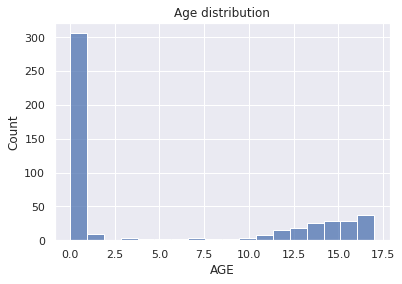

In [ ]:
sns.axes_style("white") 
ax = sns.histplot(df_filtered['AGE'], bins=18).set(title="Age distribution") 

This is also shown on the Age distribution chart above. 

Continuing to the GENDER variable, we have equal distribution of males and females, as presented as follows.

In [ ]:
df_filtered['GENDER'].value_counts()

Female    255
Male      244
Name: GENDER, dtype: int64

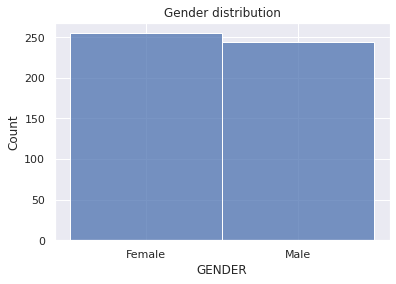

In [ ]:
sns.axes_style("white") 
ax = sns.histplot(df_filtered['GENDER']).set(title="Gender distribution")

The "RACE_NAME" variable clearly shows that the White sampled patients comprise the majority, as presented in the following table.

In [ ]:
df_filtered['RACE_NAME'].value_counts()

White                        484
Black                          6
Native American                3
Asian or Pacific Islander      3
Other                          2
Hispanic                       1
Name: RACE_NAME, dtype: int64

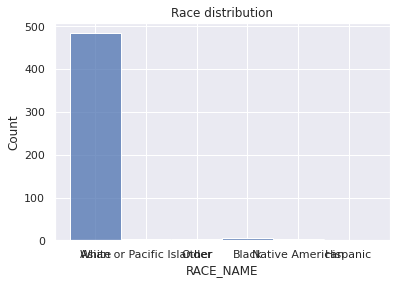

In [ ]:
sns.axes_style("white") 
ax = sns.histplot(df_filtered['RACE_NAME']).set(title="Race distribution")

When we see the APRDRG=All Patient Refined Diagnosis Related Group, we have very few diagnosises that have higher frequency in this dataframe. This is presented in the following two charts. The second chart shows the top 10 diagnosises based on the sampled patients. The top diagnosis #640 is defined as "Neonate Birthweight >2499g, Normal Newborn or Neonate with Other Problem".

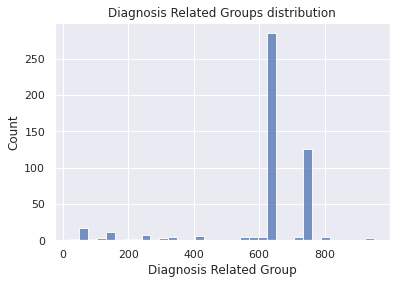

In [ ]:
ax = sns.histplot(df_filtered['APRDRG']).set(title="") 
sns.axes_style("white") 
plt.xlabel('Diagnosis Related Group')
plt.title('Diagnosis Related Groups distribution')
plt.show()

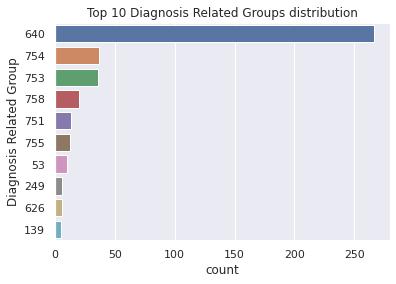

In [ ]:
sns.axes_style("white") 
ax = sns.countplot(y='APRDRG', order=df_filtered.APRDRG.value_counts().iloc[:10].index, data=df_filtered) 
plt.ylabel('Diagnosis Related Group')
plt.title('Top 10 Diagnosis Related Groups distribution')
plt.show()

In [ ]:
df_filtered.APRDRG.value_counts().head(10)

640    266
754     37
753     36
758     20
751     14
755     13
53      10
249      6
626      6
139      5
Name: APRDRG, dtype: int64

Moving forward with AVGCHG=Average Charge, we have skipped LOS=Length of Stay and TOTCHG=Total Charge, because both of them are used to calculate the Average Charge. The Average Charge distribution shows that it is skewed to the right.

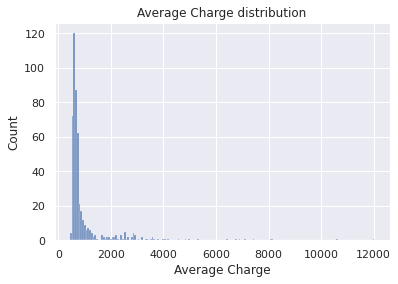

In [ ]:
ax = sns.histplot(df_filtered['AVGCHG']) 
sns.axes_style("white") 
plt.xlabel('Average Charge')
plt.title('Average Charge distribution')
plt.show()

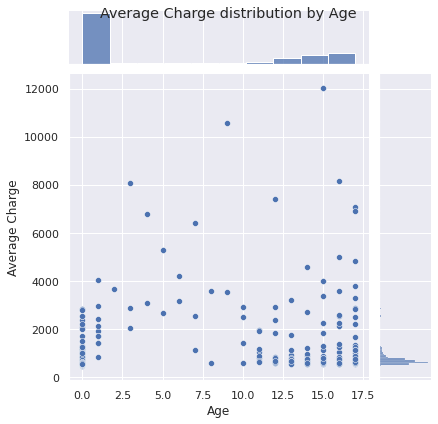

In [ ]:
ax = sns.jointplot(x='AGE', y="AVGCHG", data=df_filtered) 
sns.axes_style("white") 
ax.fig.suptitle("Average Charge distribution by Age") 
ax.set_axis_labels('Age', 'Average Charge')

The chart above demonstrating the Average Charge distribution by Age shows that there are more higher payers with higher age.

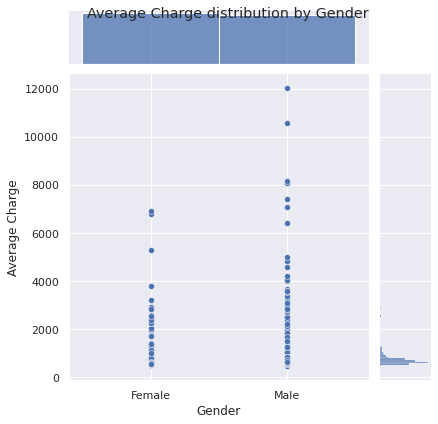

In [ ]:
ax = sns.jointplot(x='GENDER', y="AVGCHG", data=df_filtered)
sns.axes_style("white") 
ax.fig.suptitle("Average Charge distribution by Gender") 
ax.set_axis_labels('Gender', 'Average Charge')

The above Average Charge distribution by Gender shows that Males are likely to pay higher. This is also presented below in box plot chart for males and females.

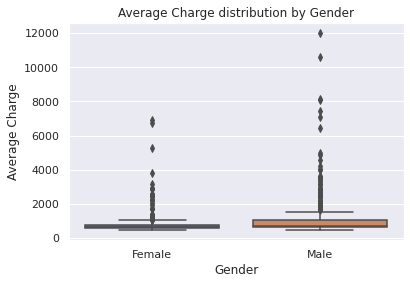

In [ ]:
sns.axes_style("white")
sns.boxplot(y="AVGCHG", x="GENDER", data=df_filtered)
plt.xlabel('Gender')
plt.ylabel('Average Charge')
plt.title('Average Charge distribution by Gender')
plt.show()

We can observe below the Average Charge distribution by Age and indexed by Gender. Older males are more likely to pay higher average charge.

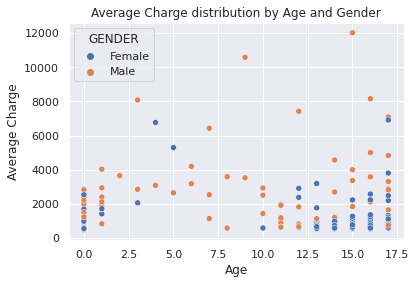

In [ ]:
ax = sns.scatterplot(x="AGE", y="AVGCHG", hue="GENDER", data=df_filtered) 
sns.set_style("white") 
plt.xlabel('Age')
plt.ylabel('Average Charge')
plt.title('Average Charge distribution by Age and Gender')
plt.show()

The Average Charge distribution by Diagnosis Related Groups and Gender shows that Diagnosis #640 doesnot cost that much compared to others. And it also shows that the males have those diagnosises with high average charges.

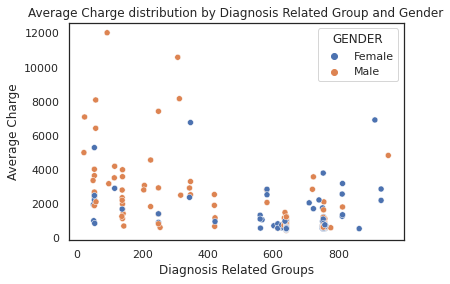

In [ ]:
ax = sns.scatterplot(x="APRDRG", y="AVGCHG", hue="GENDER", data=df_filtered) 
sns.set_style("white") 
plt.xlabel('Diagnosis Related Groups')
plt.ylabel('Average Charge')
plt.title('Average Charge distribution by Diagnosis Related Group and Gender')
plt.show()

And finally the Average Charge distribution by Diagnosis Related Groups, Race and Gender, shows a similar picture, just adding that these are White patients being the majority.

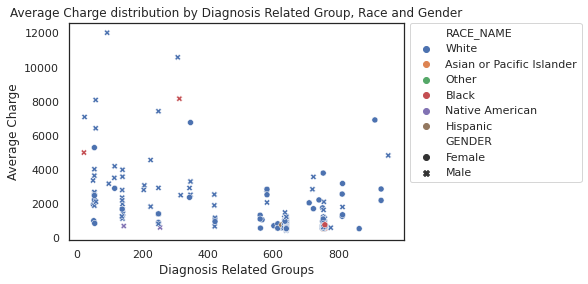

In [ ]:
ax = sns.scatterplot(x="APRDRG", y="AVGCHG", hue="RACE_NAME",  style="GENDER", data=df_filtered)
sns.set_style("white")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.xlabel('Diagnosis Related Groups')
plt.ylabel('Average Charge')
plt.title('Average Charge distribution by Diagnosis Related Group, Race and Gender')
plt.show()

####**Correlation Data Analysis**

We will conduct Correlation data analysis to investigate the realtionship between our dependent and independent variables. The correlation matrix is presenated below in two forms. The first one is a Heatmap by Seaborn and the second one is tabular result. Both of them show that dependent variable, AVGCHG=Average Charge only demostrated a higher associated with the APRDRG=Diagnosis Realted Group with a correlation coefficient of -0.55. This means an inverse relationship with increaing numbers of the Diagnosis Related Groups, the Average Charge decreases.

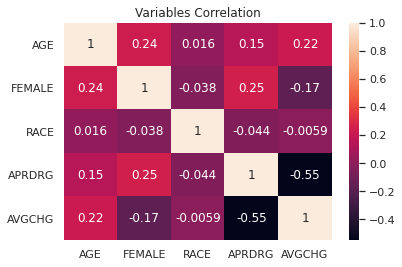

In [ ]:
corr = df_filtered.corr()
vars = ['AGE', 'FEMALE', 'RACE', 'APRDRG', 'AVGCHG']
sns.heatmap(corr.loc[vars,vars], annot=True) 
plt.title('Variables Correlation')
plt.show()

In [ ]:
df_filtered[['AGE', 'FEMALE', 'RACE', 'APRDRG', 'AVGCHG']].corr()

,AGE,FEMALE,RACE,APRDRG,AVGCHG
AGE,1.000000,0.235764,0.015850,0.147774,0.222333
FEMALE,0.235764,1.000000,-0.038434,0.252849,-0.170687
RACE,0.015850,-0.038434,1.000000,-0.043737,-0.005932
APRDRG,0.147774,0.252849,-0.043737,1.000000,-0.549342
AVGCHG,0.222333,-0.170687,-0.005932,-0.549342,1.000000


To calculate the Pearson Correlation Coefficient and its p-value to investigate its significance, we will use scipy-stats syntax, as follows.

In [ ]:
stats.pearsonr(df_filtered['APRDRG'], df_filtered['AVGCHG'])

(-0.5493419895781473, 1.1074256940238364e-40)

First investigating the realtationship between APRDRG=All Patient Refined Diagnosis Related Group and AVGCHG=Average Charge, it shows a negative significant association with p-value<0.05.

In [ ]:
stats.pearsonr(df_filtered['AGE'], df_filtered['AVGCHG'])

(0.22233263689477978, 5.248234266367967e-07)

Continuing to the relationship between Age and Average Charge, it also shows a positive siginificant association with p-value<0.05.

In [ ]:
stats.pearsonr(df_filtered['FEMALE'], df_filtered['AVGCHG'])

(-0.1706865045281081, 0.00012739688136961864)

We also investigated the relationship between being Female and Average Charge. They have a negative siginificant association with p-value<0.05.

In [ ]:
stats.pearsonr(df_filtered['RACE'], df_filtered['AVGCHG'])

(-0.005931663094192516, 0.8948481099416375)

Finally we have investigated the relationship between RACE and Average Charge. Here it should be noted that majority of our sampled patients are White, so the result may be affected by this. They have a negative assocation meaning being White has higher Average Charge, and it is not siginificant, p-value>0.05.

####**Hypothesis Testing**

For hypothesis testing, we will use t-test for independent samples. To get these independent samples, we will divide our samples into two groups. First lets analyze the age distribution of our sample. As described above, we have a high number of patients aged 0 and 1 at the lower side and a high number of patients starting at 10 to 17 years. Because we have almost two-thirds of the population at age 0 years, lets assume to create two groups with age 0 years and with age greater than 0 years. This is done as follows. 

We will take the null hypothesis stating that the mean difference of the Average Charges for those 0 years of age and those > 0 years of age is zero, or they are equal. And the alternate hypothesis states the reverse, i.e they are not equal.

In [ ]:
df_filtered_0_yrs = df_filtered.iloc[(df_filtered['AGE'] == 0).values] 
df_filtered_0_yrs.info() 
df_filtered_0_yrs['AVGCHG'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 71 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        306 non-null    int64  
 1   FEMALE     306 non-null    int64  
 2   LOS        306 non-null    int64  
 3   RACE       306 non-null    float64
 4   TOTCHG     306 non-null    int64  
 5   APRDRG     306 non-null    int64  
 6   AVGCHG     306 non-null    float64
 7   GENDER     306 non-null    object 
 8   RACE_NAME  306 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 23.9+ KB


count     306.000000
mean      738.084223
std       343.458236
min       438.500000
25%       587.125000
50%       643.666667
75%       734.125000
max      2847.000000
Name: AVGCHG, dtype: float64

In [ ]:
df_filtered_1_to_17_yrs = df_filtered.iloc[(df_filtered['AGE'] > 0).values] 
df_filtered_1_to_17_yrs.info()
df_filtered_1_to_17_yrs['AVGCHG'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 492
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        193 non-null    int64  
 1   FEMALE     193 non-null    int64  
 2   LOS        193 non-null    int64  
 3   RACE       193 non-null    float64
 4   TOTCHG     193 non-null    int64  
 5   APRDRG     193 non-null    int64  
 6   AVGCHG     193 non-null    float64
 7   GENDER     193 non-null    object 
 8   RACE_NAME  193 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 15.1+ KB


count      193.000000
mean      1608.403791
std       1826.296599
min        532.000000
25%        622.000000
50%        762.000000
75%       1907.000000
max      12024.000000
Name: AVGCHG, dtype: float64

After getting the two groups, we can go forward to input the groups into the t-test syntax as follows. The result shows a negative t-test statistic, meaning those >0 years of age have higher mean of average charge that those 0 years of age. And the p-value is siginificant, <0.05. So we reject the null hypothesis.

In [ ]:
stats.ttest_ind(df_filtered_0_yrs['AVGCHG'], df_filtered_1_to_17_yrs['AVGCHG'], equal_var=False)

Ttest_indResult(statistic=-6.547800306598145, pvalue=4.791924036487163e-10)

In [ ]:
from

To calculate the confidence interval, I have imported the maths library and collected this function from our checkpoint sessions. This function makes the calculation easy on the other hypothesis tests. And it just follows a stepwise process to get every required value to calculate the confidence interval at 95% and finally it inputs all the values in the formula. Check the following codes:

In [ ]:
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

After creating the function above, it will easily output the 95% confidence interval of the mean differences. This also shows that those >0 years old have higher mean of Average Charges than those 0 years old. 

In [ ]:
get_95_ci(df_filtered_0_yrs['AVGCHG'], df_filtered_1_to_17_yrs['AVGCHG'])

'The difference in means at the 95% confidence interval (two-tail) is between 609.8005738646145 and 1130.8385637072415.'

Taking the gender variable, "FEMALE", we will first divide the dataframe into females and males data set, as done in the following. 

Here we will take the null hypothesis stating that the mean difference of the Average Charges for females and males is zero, or they are equal. And the alternate hypothesis states the reverse, i.e they are not equal.

In [ ]:
df_filtered_Female = df_filtered.iloc[(df_filtered['FEMALE'] == 1).values] 
df_filtered_Female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 498
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        255 non-null    int64  
 1   FEMALE     255 non-null    int64  
 2   LOS        255 non-null    int64  
 3   RACE       255 non-null    float64
 4   TOTCHG     255 non-null    int64  
 5   APRDRG     255 non-null    int64  
 6   AVGCHG     255 non-null    float64
 7   GENDER     255 non-null    object 
 8   RACE_NAME  255 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 19.9+ KB


In [ ]:
df_filtered_Male = df_filtered.iloc[(df_filtered['FEMALE'] == 0).values] 
df_filtered_Male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        244 non-null    int64  
 1   FEMALE     244 non-null    int64  
 2   LOS        244 non-null    int64  
 3   RACE       244 non-null    float64
 4   TOTCHG     244 non-null    int64  
 5   APRDRG     244 non-null    int64  
 6   AVGCHG     244 non-null    float64
 7   GENDER     244 non-null    object 
 8   RACE_NAME  244 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 19.1+ KB


Inputing the groups into the t-test syntax, showed a negative t-test statistic result meaning that males have higher mean of average charges compared to females. And the p-value is significicant at <0.05. So we reject the null hypothesis.

In [ ]:
stats.ttest_ind(df_filtered_Female['AVGCHG'], df_filtered_Male['AVGCHG'])

Ttest_indResult(statistic=-3.8618705013492485, pvalue=0.00012739688136966833)

Getting the 95% Confidence interval of the mean difference using the above function, the result shows that males have higher mean of average charges compared to females.

In [ ]:
get_95_ci(df_filtered_Female['AVGCHG'], df_filtered_Male['AVGCHG'])

'The difference in means at the 95% confidence interval (two-tail) is between 205.50028142934121 and 640.6218292720864.'

As described in the Diagnosis Related Groups analysis, the top diagnosis of our sampled patients is #640. So taking this diagnosed patients as one group and the remaining other together as one group, we can conduct our hypothesis test. 

Here we will take the null hypothesis stating that the mean difference of the Average Charges for those diagnosed with #640 and those not diagnosed with #640 is zero, or they are equal. And the alternate hypothesis states the reverse, i.e they are not equal.


In [ ]:
df_filtered_APRDRG_640 = df_filtered.iloc[(df_filtered['APRDRG'] == 640).values] 
df_filtered_APRDRG_640.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 74 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        266 non-null    int64  
 1   FEMALE     266 non-null    int64  
 2   LOS        266 non-null    int64  
 3   RACE       266 non-null    float64
 4   TOTCHG     266 non-null    int64  
 5   APRDRG     266 non-null    int64  
 6   AVGCHG     266 non-null    float64
 7   GENDER     266 non-null    object 
 8   RACE_NAME  266 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 20.8+ KB


In [ ]:
df_filtered_APRDRG_NOT_640 = df_filtered.iloc[(df_filtered['APRDRG'] != 640).values] 
df_filtered_APRDRG_NOT_640.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 495
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        233 non-null    int64  
 1   FEMALE     233 non-null    int64  
 2   LOS        233 non-null    int64  
 3   RACE       233 non-null    float64
 4   TOTCHG     233 non-null    int64  
 5   APRDRG     233 non-null    int64  
 6   AVGCHG     233 non-null    float64
 7   GENDER     233 non-null    object 
 8   RACE_NAME  233 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 18.2+ KB


Inputing the groups into the t-test syntax, showed a negative t-test statistic result meaning that those not diagnosed with #640 have higher mean of average charges compared to those diagnosed with #640. And the p-value is significicant at <0.05. So we reject the null hypothesis.

In [ ]:
stats.ttest_ind(df_filtered_APRDRG_640['AVGCHG'], df_filtered_APRDRG_NOT_640['AVGCHG'])

Ttest_indResult(statistic=-8.295764843196055, pvalue=1.0209709549484431e-15)

Also the 95% Confidence interval of the mean difference using the above function, the result shows that those not diagnosed with #640 have higher mean of average charges compared to those diagnosed with #640.

In [ ]:
get_95_ci(df_filtered_APRDRG_640['AVGCHG'], df_filtered_APRDRG_NOT_640['AVGCHG'])

'The difference in means at the 95% confidence interval (two-tail) is between 647.6013738501757 and 1084.5964125329783.'

Finally for the sake of comparison, I have added the RACE variables to this hypothesis test. Again remember that our sampled patients are equally distributed by race, since White comprized 97%. To present the result for this assessment, I have grouped the sample into White and not White sample groups (only 15) as shown below. 

Here we will take the null hypothesis stating that the mean difference of the Average Charges for Whites and not Whites is zero, or they are equal. And the alternate hypothesis states the reverse, i.e they are not equal.

In [ ]:
df_filtered_RACE_White = df_filtered.iloc[(df_filtered['RACE'] == 1).values] 
df_filtered_RACE_White.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        484 non-null    int64  
 1   FEMALE     484 non-null    int64  
 2   LOS        484 non-null    int64  
 3   RACE       484 non-null    float64
 4   TOTCHG     484 non-null    int64  
 5   APRDRG     484 non-null    int64  
 6   AVGCHG     484 non-null    float64
 7   GENDER     484 non-null    object 
 8   RACE_NAME  484 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 37.8+ KB


In [ ]:
df_filtered_RACE_NOT_White = df_filtered.iloc[(df_filtered['RACE'] != 1).values] 
df_filtered_RACE_NOT_White.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 24 to 492
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        15 non-null     int64  
 1   FEMALE     15 non-null     int64  
 2   LOS        15 non-null     int64  
 3   RACE       15 non-null     float64
 4   TOTCHG     15 non-null     int64  
 5   APRDRG     15 non-null     int64  
 6   AVGCHG     15 non-null     float64
 7   GENDER     15 non-null     object 
 8   RACE_NAME  15 non-null     object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.2+ KB


Inputing the groups into the t-test syntax, showed a p-value that is not significicant at >0.05. So we fail to reject the null hypothesis.

In [ ]:
stats.ttest_ind(df_filtered_RACE_White['AVGCHG'], df_filtered_RACE_NOT_White['AVGCHG'])

Ttest_indResult(statistic=-1.3563938369569166, pvalue=0.1755897342045011)

The 95% Confidence interval of the mean difference using the above function shows a wide gap including 0, meaning that there is a chance for the means to be equal (not different).

In [ ]:
get_95_ci(df_filtered_RACE_White['AVGCHG'], df_filtered_RACE_NOT_White['AVGCHG'])

'The difference in means at the 95% confidence interval (two-tail) is between -653.3238233162635 and 1534.648256338917.'